In [1]:
# Install prophet library
!pip install prophet

Defaulting to user installation because normal site-packages is not writeable


In [2]:
#import requirements
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from prophet import Prophet
#Create bins for game splits
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]

In [3]:
#Read in CSV data files
braun_df = pd.read_csv('./resources/nuggets stats/braun.csv')
pope_df = pd.read_csv('./resources/nuggets stats/caldwell-pope.csv')
gordon_df = pd.read_csv('./resources/nuggets stats/gordon.csv')
holiday_df = pd.read_csv('./resources/nuggets stats/holiday.csv')
jokic_df = pd.read_csv('./resources/nuggets stats/jokic.csv')
murray_df = pd.read_csv('./resources/nuggets stats/murray.csv')
porterjr_df = pd.read_csv('./resources/nuggets stats/porterjr.csv')
watson_df = pd.read_csv('./resources/nuggets stats/watson.csv')
conley_df = pd.read_csv('./resources/timberwolves stats/conley.csv')
edwards_df = pd.read_csv('./resources/timberwolves stats/edwards.csv')
gobert_df = pd.read_csv('./resources/timberwolves stats/gobert.csv')
kat_df = pd.read_csv('./resources/timberwolves stats/KAT.csv')
mcdaniels_df = pd.read_csv('./resources/timberwolves stats/mcdaniels.csv')
morris_df = pd.read_csv('./resources/timberwolves stats/morris.csv')
reid_df = pd.read_csv('./resources/timberwolves stats/reid.csv')
walker_df = pd.read_csv('./resources/timberwolves stats/walker.csv')
wolves_schedule = pd.read_csv('./resources/schedules/wolves schedule.csv',parse_dates=True)
nuggets_schedule = pd.read_csv('./resources/schedules/nuggets schedule.csv',parse_dates=True)

In [4]:

wolves_schedule = wolves_schedule[['date']].copy()
wolves_schedule['date'] = pd.to_datetime(wolves_schedule['date']).dt.tz_localize(None)
wolves_schedule.info()
nuggets_schedule = wolves_schedule[['date']].copy()
nuggets_schedule['date'] = pd.to_datetime(wolves_schedule['date']).dt.tz_localize(None)
nuggets_schedule.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    97 non-null     datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 908.0 bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    97 non-null     datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 908.0 bytes


In [5]:
#combine game dates to player stats dataframe for nuggets
braun_df = pd.concat([nuggets_schedule, braun_df], axis=1) 
pope_df = pd.concat([nuggets_schedule, pope_df], axis=1)
gordon_df = pd.concat([nuggets_schedule, gordon_df], axis=1)
holiday_df = pd.concat([nuggets_schedule, holiday_df], axis=1)
jokic_df = pd.concat([nuggets_schedule, jokic_df], axis=1)
murray_df = pd.concat([nuggets_schedule, murray_df], axis=1)
porterjr_df = pd.concat([nuggets_schedule, porterjr_df], axis=1)
watson_df = pd.concat([nuggets_schedule, watson_df], axis=1)

#combine game dates to player stats dataframe for timberwolves
conley_df = pd.concat([wolves_schedule, conley_df], axis=1)
edwards_df = pd.concat([wolves_schedule, edwards_df], axis=1)
gobert_df = pd.concat([wolves_schedule, gobert_df], axis=1)
kat_df = pd.concat([wolves_schedule, kat_df], axis=1)
mcdaniels_df = pd.concat([wolves_schedule, mcdaniels_df], axis=1)
morris_df = pd.concat([wolves_schedule, morris_df], axis=1)
reid_df = pd.concat([wolves_schedule, reid_df], axis=1)
walker_df = pd.concat([wolves_schedule, walker_df], axis=1)

kat_df

,date,points,pos,min,fgm,fga,fgp,ftm,fta,ftp,...,comment,player.id,player.firstname,player.lastname,team.id,team.name,team.nickname,team.code,team.logo,game.id
0,2023-10-07 16:00:00,14.0,C,18.0,4.0,9.0,44.4,5.0,5.0,100.0,...,NaN,519.0,Karl-Anthony,Towns,22.0,Minnesota Timberwolves,Timberwolves,MIN,https://upload.wikimedia.org/wikipedia/fr/thum...,12478.0
1,2023-10-14 23:30:00,17.0,C,27.0,6.0,14.0,42.9,1.0,2.0,50.0,...,NaN,519.0,Karl-Anthony,Towns,22.0,Minnesota Timberwolves,Timberwolves,MIN,https://upload.wikimedia.org/wikipedia/fr/thum...,12511.0
2,2023-10-18 00:00:00,19.0,C,36.0,8.0,25.0,32.0,1.0,1.0,100.0,...,NaN,519.0,Karl-Anthony,Towns,22.0,Minnesota Timberwolves,Timberwolves,MIN,https://upload.wikimedia.org/wikipedia/fr/thum...,12557.0
3,2023-10-20 00:00:00,12.0,C,31.0,5.0,12.0,41.7,1.0,2.0,50.0,...,NaN,519.0,Karl-Anthony,Towns,22.0,Minnesota Timberwolves,Timberwolves,MIN,https://upload.wikimedia.org/wikipedia/fr/thum...,12581.0
4,2023-10-25 23:30:00,16.0,C,36.0,7.0,17.0,41.2,1.0,1.0,100.0,...,NaN,519.0,Karl-Anthony,Towns,22.0,Minnesota Timberwolves,Timberwolves,MIN,https://upload.wikimedia.org/wikipedia/fr/thum...,12592.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,2024-05-11 01:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93,2024-05-13 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
94,2024-05-15 02:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95,2024-05-17 00:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:

braun_impact = braun_impact.rename(columns={'date':'ds','plusMinus':'y'})
#print(braun_impact.plot(xlabel='games',ylabel='number',title='Braun Plus/Minus'))
#print(braun_impact)
braun_model = Prophet()
braun_model.fit(braun_impact)

NameError: name 'braun_impact' is not defined

In [ ]:
braun_future = braun_model.make_future_dataframe(periods=3, freq='D')
braun_forecast = braun_model.predict(braun_future)
braun_forecast

In [ ]:

braun_forecast[['yhat','trend']].plot(legend='Braun impact trend',title='Braun Impact forecast Trend')
display(braun_forecast[['trend','yhat']])

18:35:28 - cmdstanpy - INFO - Chain [1] start processing
18:35:28 - cmdstanpy - INFO - Chain [1] done processing


,trend,yhat
0,0.798192,4.862005
1,0.905465,-2.513871
2,0.949780,3.858467
3,0.979120,-5.531465
4,1.066833,-2.040998
...,...,...
87,3.722069,5.068746
88,3.767912,4.270473
89,3.782582,-2.781157
90,3.797252,-0.395263


18:35:28 - cmdstanpy - INFO - Chain [1] start processing
18:35:29 - cmdstanpy - INFO - Chain [1] done processing


,trend,yhat
0,3.799278,-0.943538
1,3.701147,3.344552
2,3.660609,7.151538
3,3.633770,7.441701
4,3.553532,11.049680
...,...,...
85,1.247604,-5.123627
86,1.167086,-14.180889
87,1.153667,-5.217564
88,1.140247,-5.457404


18:35:29 - cmdstanpy - INFO - Chain [1] start processing
18:35:29 - cmdstanpy - INFO - Chain [1] done processing


,trend,yhat
0,8.451520,5.670671
1,8.407567,3.923981
2,8.389410,4.591574
3,8.377389,11.071752
4,8.341450,7.556521
...,...,...
82,7.319514,1.236728
83,7.308620,-24.630574
84,7.302609,-17.623841
85,7.296599,-17.836763


18:35:29 - cmdstanpy - INFO - Chain [1] start processing
18:35:29 - cmdstanpy - INFO - Chain [1] done processing


,trend,yhat
0,-6.926634,5.151044
1,-6.920185,4.496299
2,-6.917521,-4.393054
3,-6.915757,-3.880028
4,-6.910484,1.871458
...,...,...
68,-6.784299,6.869505
69,-6.782554,0.170748
70,-6.781672,-3.553501
71,-6.780790,-0.171747


18:35:29 - cmdstanpy - INFO - Chain [1] start processing
18:35:30 - cmdstanpy - INFO - Chain [1] done processing


,trend,yhat
0,8.144033,0.958446
1,8.119361,6.296688
2,8.109168,9.528707
3,8.102420,12.998241
4,8.082247,8.789032
...,...,...
88,7.461009,6.692426
89,7.454401,7.974203
90,7.451027,2.500125
91,7.447653,10.131151


18:35:30 - cmdstanpy - INFO - Chain [1] start processing
18:35:30 - cmdstanpy - INFO - Chain [1] done processing


,trend,yhat
0,19.803433,11.951527
1,19.685936,3.822624
2,19.637397,7.132508
3,19.605261,3.266580
4,19.509187,11.875075
...,...,...
68,17.210122,-2.041497
69,17.178321,-0.371578
70,17.162253,4.457730
71,17.146185,6.560849


18:35:30 - cmdstanpy - INFO - Chain [1] start processing
18:35:30 - cmdstanpy - INFO - Chain [1] done processing


,trend,yhat
0,-0.117915,11.876123
1,-0.124777,10.105197
2,-0.127612,6.678498
3,-0.129488,7.214758
4,-0.135099,1.592157
...,...,...
86,-0.301967,-1.488686
87,-0.304939,5.327571
88,-0.305877,1.421379
89,-0.306816,5.750144


18:35:31 - cmdstanpy - INFO - Chain [1] start processing
18:35:31 - cmdstanpy - INFO - Chain [1] done processing


,trend,yhat
0,0.412706,-4.065107
1,0.485326,-1.341967
2,0.515326,0.263782
3,0.535188,-1.622980
4,0.594567,-1.808480
...,...,...
90,2.501111,-0.811718
91,2.522215,-5.136260
92,2.532146,-0.833275
93,2.542077,-2.173732


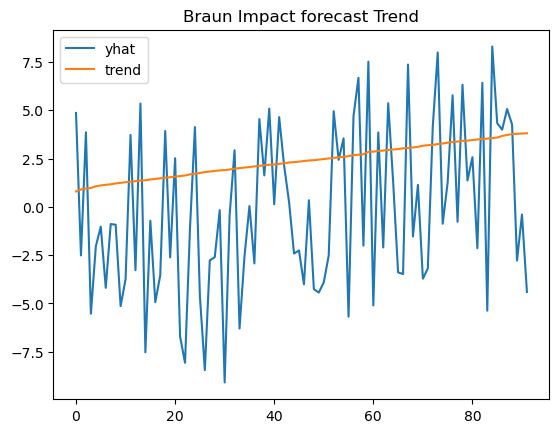

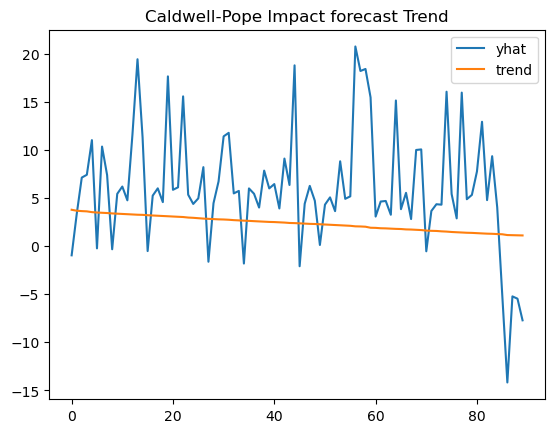

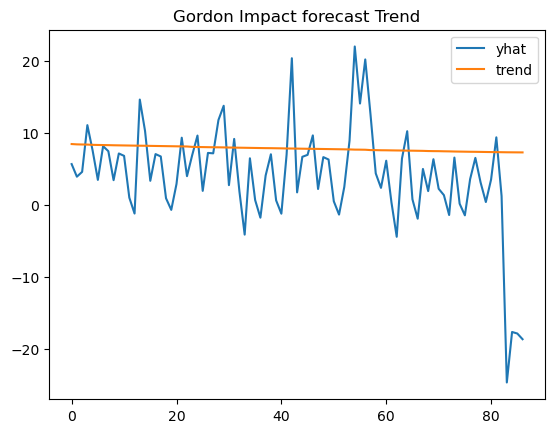

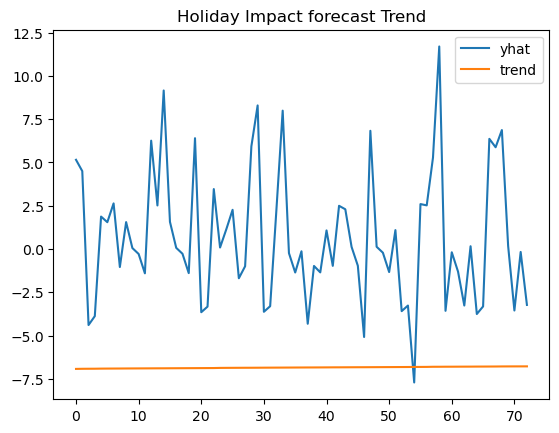

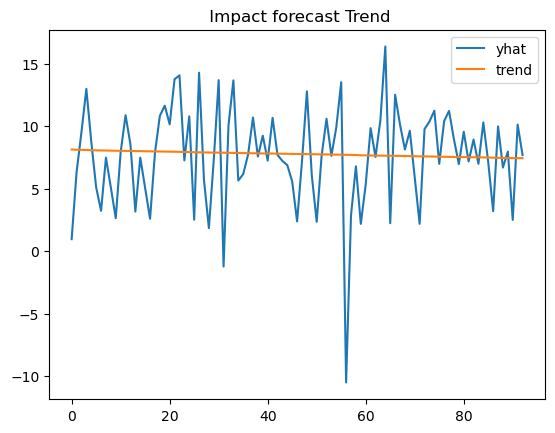

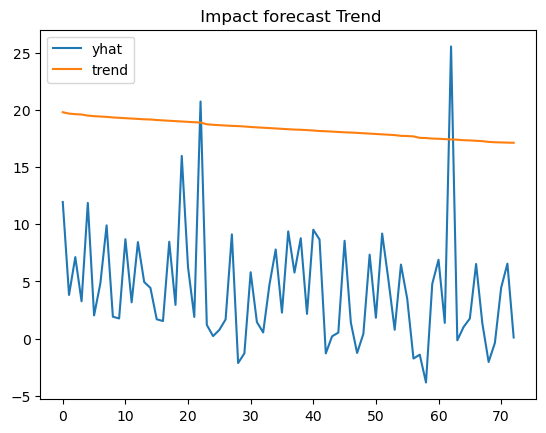

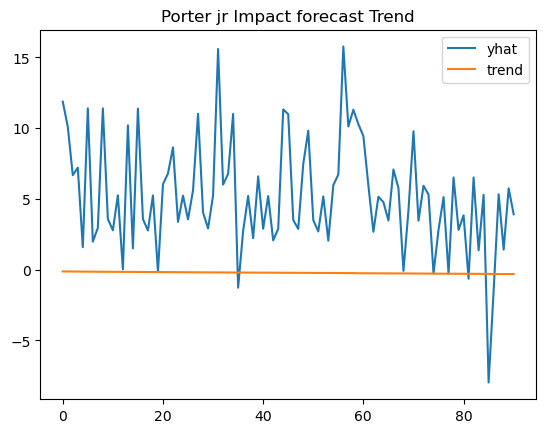

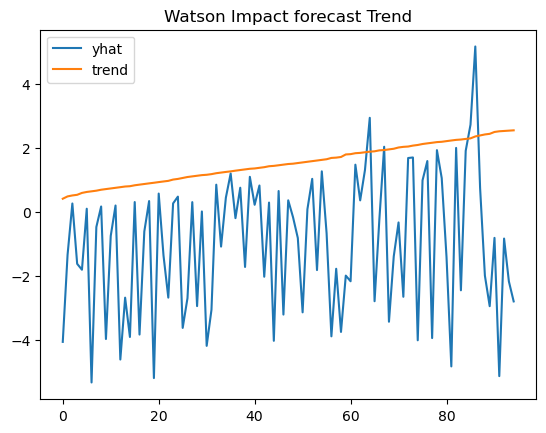

In [10]:
#nuggets player impact(as determined by plus/minus), and date, renamed to prophet syntax
braun_impact = braun_df[['date','plusMinus']]
braun_impact = braun_impact.rename(columns={'date':'ds','plusMinus':'y'})
braun_model = Prophet()
braun_model.fit(braun_impact)
braun_future = braun_model.make_future_dataframe(periods=3, freq='D')
braun_forecast = braun_model.predict(braun_future)
braun_forecast[['yhat','trend']].plot(legend='Braun impact trend',title='Braun Impact forecast Trend')
display(braun_forecast[['trend','yhat']])

pope_impact = pope_df[['date','plusMinus']]
pope_impact = pope_impact.rename(columns={'date':'ds','plusMinus':'y'})
pope_model = Prophet()
pope_model.fit(pope_impact)
pope_future = pope_model.make_future_dataframe(periods=3, freq='D')
pope_forecast = pope_model.predict(pope_future)
pope_forecast[['yhat','trend']].plot(legend='Caldwell-Pope impact trend',title='Caldwell-Pope Impact forecast Trend')
display(pope_forecast[['trend','yhat']])

gordon_impact = gordon_df[['date','plusMinus']]
gordon_impact = gordon_impact.rename(columns={'date':'ds','plusMinus':'y'})
gordon_model = Prophet()
gordon_model.fit(gordon_impact)
gordon_future = gordon_model.make_future_dataframe(periods=3, freq='D')
gordon_forecast = gordon_model.predict(gordon_future)
gordon_forecast[['yhat','trend']].plot(legend='Gordon impact trend',title='Gordon Impact forecast Trend')
display(gordon_forecast[['trend','yhat']])

holiday_impact = holiday_df[['date','plusMinus']]
holiday_impact = holiday_impact.rename(columns={'date':'ds','plusMinus':'y'})
holiday_model = Prophet()
holiday_model.fit(holiday_impact)
holiday_future = holiday_model.make_future_dataframe(periods=3, freq='D')
holiday_forecast = holiday_model.predict(holiday_future)
holiday_forecast[['yhat','trend']].plot(legend='Holiday impact trend',title='Holiday Impact forecast Trend')
display(holiday_forecast[['trend','yhat']])

jokic_impact = jokic_df[['date','plusMinus']]
jokic_impact = jokic_impact.rename(columns={'date':'ds','plusMinus':'y'})
jokic_model = Prophet()
jokic_model.fit(jokic_impact)
jokic_future = jokic_model.make_future_dataframe(periods=3, freq='D')
jokic_forecast = jokic_model.predict(jokic_future)
jokic_forecast[['yhat','trend']].plot(legend=' impact trend',title=' Impact forecast Trend')
display(jokic_forecast[['trend','yhat']])

murray_impact = murray_df[['date','plusMinus']]
murray_impact = murray_impact.rename(columns={'date':'ds','plusMinus':'y'})
murray_model = Prophet()
murray_model.fit(murray_impact)
murray_future = murray_model.make_future_dataframe(periods=3, freq='D')
murray_forecast = murray_model.predict(murray_future)
murray_forecast[['yhat','trend']].plot(legend=' impact trend',title=' Impact forecast Trend')
display(murray_forecast[['trend','yhat']])

porterjr_impact = porterjr_df[['date','plusMinus']]
porterjr_impact = porterjr_impact.rename(columns={'date':'ds','plusMinus':'y'})
porterjr_model = Prophet()
porterjr_model.fit(porterjr_impact)
porterjr_future = porterjr_model.make_future_dataframe(periods=3, freq='D')
porterjr_forecast = porterjr_model.predict(porterjr_future)
porterjr_forecast[['yhat','trend']].plot(legend='Porter jr impact trend',title='Porter jr Impact forecast Trend')
display(porterjr_forecast[['trend','yhat']])

watson_impact = watson_df[['date','plusMinus']]
watson_impact = watson_impact.rename(columns={'date':'ds','plusMinus':'y'})
watson_model = Prophet()
watson_model.fit(watson_impact)
watson_future = watson_model.make_future_dataframe(periods=3, freq='D')
watson_forecast = watson_model.predict(watson_future)
watson_forecast[['yhat','trend']].plot(legend='Watson impact trend',title='Watson Impact forecast Trend')
display(watson_forecast[['trend','yhat']])

In [ ]:
#timberwolves player impact(as determined by plus/minus), and date, renamed to prophet syntax
conley_impact = conley_df[['date','plusMinus']]
conley_impact = conley_impact.rename(columns={'date':'ds','plusMinus':'y'})
print(conley_impact.plot(title='Conley Plus/Minus'))
print(conley_impact)

edwards_impact = edwards_df[['date','plusMinus']]
edwards_impact = edwards_impact.rename(columns={'date':'ds','plusMinus':'y'})
print(edwards_impact.plot(title='Edwards Plus/Minus'))
print(edwards_impact)

gobert_impact = gobert_df[['date','plusMinus']]
gobert_impact = gobert_impact.rename(columns={'date':'ds','plusMinus':'y'})
print(gobert_impact.plot(title='Gobert Plus/Minus'))
print(gobert_impact)

kat_impact = kat_df[['date','plusMinus']]
kat_impact = kat_impact.rename(columns={'date':'ds','plusMinus':'y'})
print(holiday_impact.plot(title='Towns Plus/Minus'))
print(kat_impact)

mcdaniels_impact = mcdaniels_df[['date','plusMinus']]
mcdaniels_impact = mcdaniels_impact.rename(columns={'date':'ds','plusMinus':'y'})
print(mcdaniels_impact.plot(title='McDaniels Plus/Minus'))
print(jokic_impact)

morris_impact = morris_df[['date','plusMinus']]
morris_impact = morris_impact.rename(columns={'date':'ds','plusMinus':'y'})
print(morris_impact.plot(title='Morris Plus/Minus'))
print(morris_impact)

reid_impact = reid_df[['date','plusMinus']]
reid_impact = reid_impact.rename(columns={'date':'ds','plusMinus':'y'})
print(reid_impact.plot(title='Reid Plus/Minus'))
print(reid_impact)

walker_impact = walker_df[['date','plusMinus']]
walker_impact = walker_impact.rename(columns={'date':'ds','plusMinus':'y'})
print(walker_impact.plot(title='Walker Plus/Minus'))
print(walker_impact)

In [ ]:
#group nuggets players stats into bins
braun_groups = (braun_df.groupby(pd.cut(braun_df.index, bins),observed=False)
[['points', 'min', 'fgp','tpp','totReb','assists','pFouls','steals','blocks','plusMinus']].mean()
).reset_index()
braun_groups = braun_groups.rename(columns={'index':'games'})
braun_groups.plot(legend='plusMinus',title='Braun')
display(braun_groups)

pope_groups = (braun_df.groupby(pd.cut(braun_df.index, bins),observed=False)
[['points', 'min', 'fgp','tpp','totReb','assists','pFouls','steals','blocks','plusMinus']].mean()
).reset_index()
pope_groups = pope_groups.rename(columns={'index':'games'})
pope_groups.plot(title='Caldwell-Pope')
display(pope_groups)

gordon_groups = (gordon_df.groupby(pd.cut(gordon_df.index, bins),observed=False)
[['points', 'min', 'fgp','tpp','totReb','assists','pFouls','steals','blocks','plusMinus']].mean()
).reset_index()
gordon_groups = gordon_groups.rename(columns={'index':'games'})
gordon_groups.plot(legend='plusMinus',title='Gordon')
display(gordon_groups)

holiday_groups = (holiday_df.groupby(pd.cut(holiday_df.index, bins),observed=False)
[['points', 'min', 'fgp','tpp','totReb','assists','pFouls','steals','blocks','plusMinus']].mean()
).reset_index()
holiday_groups = holiday_groups.rename(columns={'index':'games'})
holiday_groups.plot(title='Holiday')
display(holiday_groups)

jokic_groups = (jokic_df.groupby(pd.cut(jokic_df.index, bins),observed=False)
[['points', 'min', 'fgp','tpp','totReb','assists','pFouls','steals','blocks','plusMinus']].mean()
).reset_index()
jokic_groups = jokic_groups.rename(columns={'index':'games'})
jokic_groups.plot(title='jokic')
display(jokic_groups)

murray_groups = (murray_df.groupby(pd.cut(murray_df.index, bins),observed=False)
[['points', 'min', 'fgp','tpp','totReb','assists','pFouls','steals','blocks','plusMinus']].mean()
).reset_index()
murray_groups = murray_groups.rename(columns={'index':'games'})
murray_groups.plot(title='Murray')
display(murray_groups)

porterjr_groups = (porterjr_df.groupby(pd.cut(porterjr_df.index, bins),observed=False)
[['points', 'min', 'fgp','tpp','totReb','assists','pFouls','steals','blocks','plusMinus']].mean()
).reset_index()
porterjr_groups = porterjr_groups.rename(columns={'index':'games'})
porterjr_groups.plot(title='Porter jr')
display(porterjr_groups)

watson_groups = (watson_df.groupby(pd.cut(watson_df.index, bins),observed=False)
[['points', 'min', 'fgp','tpp','totReb','assists','pFouls','steals','blocks','plusMinus']].mean()
).reset_index()
watson_groups = watson_groups.rename(columns={'index':'games'})
watson_groups.plot(title='Watson')
display(watson_groups)

In [ ]:
#get and plot nuggets players plusMinus splits
braun_plusMinus_groups = (braun_df.groupby(pd.cut(braun_df.index, bins),observed=False)
['plusMinus'].mean()
).reset_index()
braun_plusMinus_groups = braun_plusMinus_groups.rename(columns={'index':'games'})
braun_plusMinus_groups.plot(legend='plusMinus',title='Braun plus/minus')
display(braun_plusMinus_groups)

pope_plusMinus_groups = (braun_df.groupby(pd.cut(braun_df.index, bins),observed=False)
['plusMinus'].mean()
).reset_index()
pope_plusMinus_groups = pope_plusMinus_groups.rename(columns={'index':'games'})
pope_plusMinus_groups.plot(title='Caldwell-Pope plus/minus')
display(pope_plusMinus_groups)

gordon_plusMinus_groups = (gordon_df.groupby(pd.cut(gordon_df.index, bins),observed=False)
['plusMinus'].mean()
).reset_index()
gordon_plusMinus_groups = gordon_plusMinus_groups.rename(columns={'index':'games'})
gordon_plusMinus_groups.plot(legend='plusMinus',title='Gordon plus/minus')
display(gordon_plusMinus_groups)

holiday_plusMinus_groups = (holiday_df.groupby(pd.cut(holiday_df.index, bins),observed=False)
['plusMinus'].mean()
).reset_index()
holiday_plusMinus_groups = holiday_plusMinus_groups.rename(columns={'index':'games'})
holiday_plusMinus_groups.plot(legend='plusMinus',title='Holiday plus/minus')
display(holiday_plusMinus_groups)

jokic_plusMinus_groups = (jokic_df.groupby(pd.cut(jokic_df.index, bins),observed=False)
['plusMinus'].mean()
).reset_index()
jokic_plusMinus_groups = jokic_plusMinus_groups.rename(columns={'index':'games'})
jokic_plusMinus_groups.plot(legend='plusMinus',title='jokic plus/minus')
display(jokic_plusMinus_groups)

murray_plusMinus_groups = (murray_df.groupby(pd.cut(murray_df.index, bins),observed=False)
['plusMinus'].mean()
).reset_index()
murray_plusMinus_groups = murray_plusMinus_groups.rename(columns={'index':'games'})
murray_plusMinus_groups.plot(legend='plusMinus',title='Murray plus/minus')
display(murray_plusMinus_groups)

porterjr_plusMinus_groups = (porterjr_df.groupby(pd.cut(porterjr_df.index, bins),observed=False)
['plusMinus'].mean()
).reset_index()
porterjr_plusMinus_groups = porterjr_plusMinus_groups.rename(columns={'index':'games'})
porterjr_plusMinus_groups.plot(legend='plusMinus',title='Porter JR plus/minus')
display(porterjr_plusMinus_groups)

watson_plusMinus_groups = (watson_df.groupby(pd.cut(watson_df.index, bins),observed=False)
['plusMinus'].mean()
).reset_index()
watson_plusMinus_groups = watson_plusMinus_groups.rename(columns={'index':'games'})
watson_plusMinus_groups.plot(legend='plusMinus',title='Watson plus/minus')
display(watson_plusMinus_groups)

In [ ]:
#get timberwolves player stat splits based on bins
conley_groups = (conley_df.groupby(pd.cut(conley_df.index, bins),observed=False)
[['points', 'min', 'fgp','tpp','totReb','assists','pFouls','steals','blocks','plusMinus']].mean()
).reset_index()
conley_groups = conley_groups.rename(columns={'index':'games'})
conley_groups.plot(title='Conley')
display(conley_groups)

edwards_groups = (edwards_df.groupby(pd.cut(edwards_df.index, bins),observed=False)
[['points', 'min', 'fgp','tpp','totReb','assists','pFouls','steals','blocks','plusMinus']].mean()
).reset_index()
edwards_groups = edwards_groups.rename(columns={'index':'games'})
edwards_groups.plot(title='Edwards')
display(edwards_groups)

gobert_groups = (gobert_df.groupby(pd.cut(gobert_df.index, bins),observed=False)
[['points', 'min', 'fgp','tpp','totReb','assists','pFouls','steals','blocks','plusMinus']].mean()
).reset_index()
gobert_groups = gobert_groups.rename(columns={'index':'games'})
gobert_groups.plot(title='Gobert')
display(gobert_groups)

kat_groups = (kat_df.groupby(pd.cut(kat_df.index, bins),observed=False)
[['points', 'min', 'fgp','tpp','totReb','assists','pFouls','steals','blocks','plusMinus']].mean()
).reset_index()
kat_groups = kat_groups.rename(columns={'index':'games'})
kat_groups.plot(title='Towns')
display(kat_groups)

mcdaniels_groups = (mcdaniels_df.groupby(pd.cut(mcdaniels_df.index, bins),observed=False)
[['points', 'min', 'fgp','tpp','totReb','assists','pFouls','steals','blocks','plusMinus']].mean()
).reset_index()
mcdaniels_groups = mcdaniels_groups.rename(columns={'index':'games'})
mcdaniels_groups.plot(title='McDaniels')
display(mcdaniels_groups)

morris_groups = (morris_df.groupby(pd.cut(morris_df.index, bins),observed=False)
[['points', 'min', 'fgp','tpp','totReb','assists','pFouls','steals','blocks','plusMinus']].mean()
).reset_index()
morris_groups = morris_groups.rename(columns={'index':'games'})
morris_groups.plot(title='Morris')
display(morris_groups)

reid_groups = (reid_df.groupby(pd.cut(reid_df.index, bins),observed=False)
[['points', 'min', 'fgp','tpp','totReb','assists','pFouls','steals','blocks','plusMinus']].mean()
).reset_index()
reid_groups = reid_groups.rename(columns={'index':'games'})
reid_groups.plot(title='Reid')
display(reid_groups)

walker_groups = (walker_df.groupby(pd.cut(walker_df.index, bins),observed=False)
[['points', 'min', 'fgp','tpp','totReb','assists','pFouls','steals','blocks','plusMinus']].mean()
).reset_index()
walker_groups = walker_groups.rename(columns={'index':'games'})
walker_groups.plot(title='Walker')
display(walker_groups)

In [ ]:
#get timberwolves players plus minus stat splits
conley_plusMinus_groups = (conley_df.groupby(pd.cut(conley_df.index, bins),observed=False)
['plusMinus'].mean()
).reset_index()
conley_plusMinus_groups = conley_plusMinus_groups.rename(columns={'index':'games'})
conley_plusMinus_groups.plot(legend='plusMinus',title='Conley')
display(conley_plusMinus_groups)

edwards_plusMinus_groups = (edwards_df.groupby(pd.cut(edwards_df.index, bins),observed=False)
['plusMinus'].mean()
).reset_index()
edwards_plusMinus_groups = edwards_plusMinus_groups.rename(columns={'index':'games'})
edwards_plusMinus_groups.plot(legend='plusMinus',title='Edwards')
display(edwards_plusMinus_groups)

gobert_plusMinus_groups = (gobert_df.groupby(pd.cut(gobert_df.index, bins),observed=False)
['plusMinus'].mean()
).reset_index()
gobert_plusMinus_groups = gobert_plusMinus_groups.rename(columns={'index':'games'})
gobert_plusMinus_groups.plot(legend='plusMinus',title='Gobert')
display(gobert_plusMinus_groups)

kat_plusMinus_groups = (kat_df.groupby(pd.cut(kat_df.index, bins),observed=False)
['plusMinus'].mean()
).reset_index()
kat_plusMinus_groups = kat_plusMinus_groups.rename(columns={'index':'games'})
kat_plusMinus_groups.plot(legend='plusMinus',title='Towns')
display(kat_plusMinus_groups)

mcdaniels_plusMinus_groups = (mcdaniels_df.groupby(pd.cut(mcdaniels_df.index, bins),observed=False)
['plusMinus'].mean()
).reset_index()
mcdaniels_plusMinus_groups = mcdaniels_plusMinus_groups.rename(columns={'index':'games'})
mcdaniels_plusMinus_groups.plot(legend='plusMinus',title='McDaniels')
display(mcdaniels_plusMinus_groups)

morris_plusMinus_groups = (morris_df.groupby(pd.cut(morris_df.index, bins),observed=False)
['plusMinus'].mean()
).reset_index()
morris_plusMinus_groups = morris_plusMinus_groups.rename(columns={'index':'games'})
morris_plusMinus_groups.plot(legend='plusMinus',title='Morris')
display(morris_plusMinus_groups)

reid_plusMinus_groups = (reid_df.groupby(pd.cut(reid_df.index, bins),observed=False)
['plusMinus'].mean()
).reset_index()
reid_plusMinus_groups = reid_plusMinus_groups.rename(columns={'index':'games'})
reid_plusMinus_groups.plot(legend='plusMinus',title='Reid')
display(reid_plusMinus_groups)

walker_plusMinus_groups = (walker_df.groupby(pd.cut(walker_df.index, bins),observed=False)
['plusMinus'].mean()
).reset_index()
walker_plusMinus_groups = walker_plusMinus_groups.rename(columns={'index':'games'})
walker_plusMinus_groups.plot(legend='plusMinus',title='Walker')
display(walker_plusMinus_groups)

In [ ]:
braun_points = braun_df[['points', 'min', 'fgp','tpp','totReb','assists','pFouls','steals','blocks','plusMinus']].mean()
braun_info = {'Braun':'G'}
display(braun_info)
display(braun_points)

In [ ]:
pope_points = pope_df[['points', 'min', 'fgp','tpp','totReb','assists','pFouls','steals','blocks','plusMinus']].mean()
caldwellpope = {'Caldwell-Pope' : 'F'}
display(caldwellpope)
pope_points.plot()

In [ ]:
gordon_points = gordon_df[['points', 'min', 'fgp','tpp','totReb','assists','pFouls','steals','blocks','plusMinus']].mean()
gordon = {'Gordon':'G'}
display(gordon)
gordon_points

In [ ]:
holiday_points = holiday_df[['points', 'min', 'fgp','tpp','totReb','assists','pFouls','steals','blocks','plusMinus']].mean()
holiday_points

In [ ]:
jokic_points = jokic_df[['points', 'min', 'fgp','tpp','totReb','assists','pFouls','steals','blocks','plusMinus']].mean()
jokic_points

In [ ]:
murray_points = murray_df[['points', 'min', 'fgp','tpp','totReb','assists','pFouls','steals','blocks','plusMinus']].mean()
murray_points

In [ ]:
porterjr_points = porterjr_df[['points', 'min', 'fgp','tpp','totReb','assists','pFouls','steals','blocks','plusMinus']].mean()
porterjr_points

In [ ]:
watson_points = watson_df[['points', 'min', 'fgp','tpp','totReb','assists','pFouls','steals','blocks','plusMinus']].mean()
watson_points

In [ ]:
conley_points = conley_df[['points', 'min', 'fgp','tpp','totReb','assists','pFouls','steals','blocks','plusMinus']].mean()
conley_points

In [ ]:
edwards_points = edwards_df[['points', 'min', 'fgp','tpp','totReb','assists','pFouls','steals','blocks','plusMinus']].mean()
edwards_points

In [ ]:
gobert_points = gobert_df[['points', 'min', 'fgp','tpp','totReb','assists','pFouls','steals','blocks','plusMinus']].mean()
gobert_points

In [ ]:
kat_points = kat_df[['points', 'min', 'fgp','tpp','totReb','assists','pFouls','steals','blocks','plusMinus']].mean()
kat_points

In [ ]:
mcdaniels_points = mcdaniels_df[['points', 'min', 'fgp','tpp','totReb','assists','pFouls','steals','blocks','plusMinus']].mean()
mcdaniels_points

In [ ]:
morris_points = morris_df[['points', 'min', 'fgp','tpp','totReb','assists','pFouls','steals','blocks','plusMinus']].mean()
morris_points

In [ ]:
reid_points = reid_df[['points', 'min', 'fgp','tpp','totReb','assists','pFouls','steals','blocks','plusMinus']].mean()
reid_points

In [ ]:
walker_points = walker_df[['points', 'min', 'fgp','tpp','totReb','assists','pFouls','steals','blocks','plusMinus']].mean()
walker_points